In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def matrixeqtl(filepath):
    res = dict()
    with open(filepath, 'r') as mfile:
        next(mfile)
        for line in mfile:
            arr  = line.strip().split("\t")
            rsid = arr[0]
            pval = float(arr[4])
            if rsid.get(res, False):
                res[rsid] = pval
    return np.array(list(res.values()))

def matrixeqtl_fdr(filepath):
    res = dict()
    with open(filepath, 'r') as mfile:
        next(mfile)
        for line in mfile:
            arr  = line.strip().split("\t")
            rsid = arr[0]
            fdr  = float(arr[5])
            if rsid.get(res, False):
                res[rsid] = fdr
    return np.array(list(res.values()))

def read_tejaas_rr_pvals(filename):
    # print("Loading ", filename)
    pvals = list()
    with open(filename, "r") as mfile:
        next(mfile)
        for line in mfile:
            pvals.append(float(line.split()[5]))
    pvals = np.array(pvals)
    return pvals

0 1 

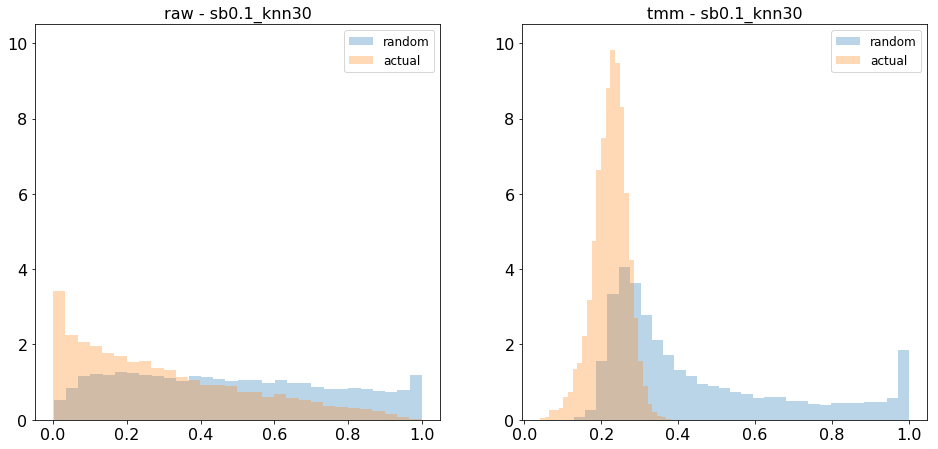

In [38]:

basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/gtex_v6_gtknn_notnoisy/"
expressions = ["raw", "tmm"]
# sbs = ["Dynamic", "Dynamic_knn30"]
sbs = ["0.1_knn30"] #, "0.1"]
fig = plt.figure(figsize=(16,16))
i = 0
datadict = dict()
for expr in expressions:
    for sb in sbs:
        outdir = os.path.join(basedir, expr, "gtex-ms/tejaas/permnull_sb{:s}/".format(sb))
        outdir_random = os.path.join(basedir, expr, "gtex-ms/tejaas_rand/permnull_sb{:s}/".format(sb))

        pvals = np.array([])
        pvals_random = np.array([])
        for chrm in range(21,22):
            outfile = os.path.join(outdir+"chr"+str(chrm), "rr.txt")
            outfile_random = os.path.join(outdir_random+"chr"+str(chrm), "rr.txt")
            pvals = np.append(pvals, read_tejaas_rr_pvals(outfile))
            pvals_random = np.append(pvals_random, read_tejaas_rr_pvals(outfile_random))

        datadict[expr+"_"+sb] = pvals
        datadict[expr+"_"+sb+"_rand"] = pvals_random
        
        print(i, end=" ")
        ax = fig.add_subplot(len(expressions),2,i+1)
        ax.hist(pvals_random, bins=30, density=True, alpha=0.3, label="random")
        ax.hist(pvals, bins=30, density=True, alpha=0.3, label="actual")
        ax.legend()
        ax.set_title("{:s} - sb{:s}".format(expr.replace("/", "_"), sb))
        ax.set_ylim(0,10.5)
        i += 1
plt.show()

0 1 

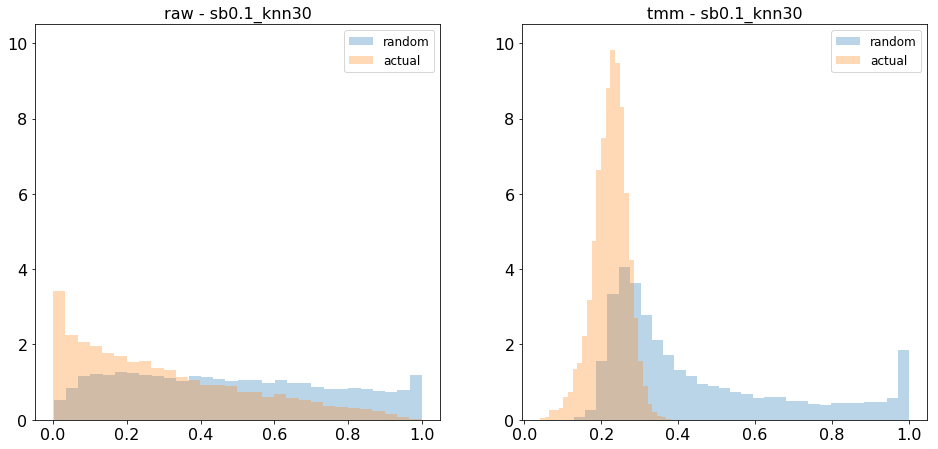

In [40]:

basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/gtex_v6_gtknn/"
expressions = ["raw", "tmm"]
# sbs = ["Dynamic", "Dynamic_knn30"]
sbs = ["0.1_knn30"] #, "0.1"]
fig = plt.figure(figsize=(16,16))
i = 0
datadict = dict()
for expr in expressions:
    for sb in sbs:
        outdir = os.path.join(basedir, expr, "gtex-ms/tejaas/permnull_sb{:s}/".format(sb))
        outdir_random = os.path.join(basedir, expr, "gtex-ms/tejaas_rand/permnull_sb{:s}/".format(sb))

        pvals = np.array([])
        pvals_random = np.array([])
        for chrm in range(21,22):
            outfile = os.path.join(outdir+"chr"+str(chrm), "rr.txt")
            outfile_random = os.path.join(outdir_random+"chr"+str(chrm), "rr.txt")
            pvals = np.append(pvals, read_tejaas_rr_pvals(outfile))
            pvals_random = np.append(pvals_random, read_tejaas_rr_pvals(outfile_random))

        datadict[expr+"_"+sb] = pvals
        datadict[expr+"_"+sb+"_rand"] = pvals_random
        
        print(i, end=" ")
        ax = fig.add_subplot(len(expressions),2,i+1)
        ax.hist(pvals_random, bins=30, density=True, alpha=0.3, label="random")
        ax.hist(pvals, bins=30, density=True, alpha=0.3, label="actual")
        ax.legend()
        ax.set_title("{:s} - sb{:s}".format(expr.replace("/", "_"), sb))
        ax.set_ylim(0,10.5)
        i += 1
plt.show()

/usr/users/fsimone/opt/miniconda/3/envs/env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


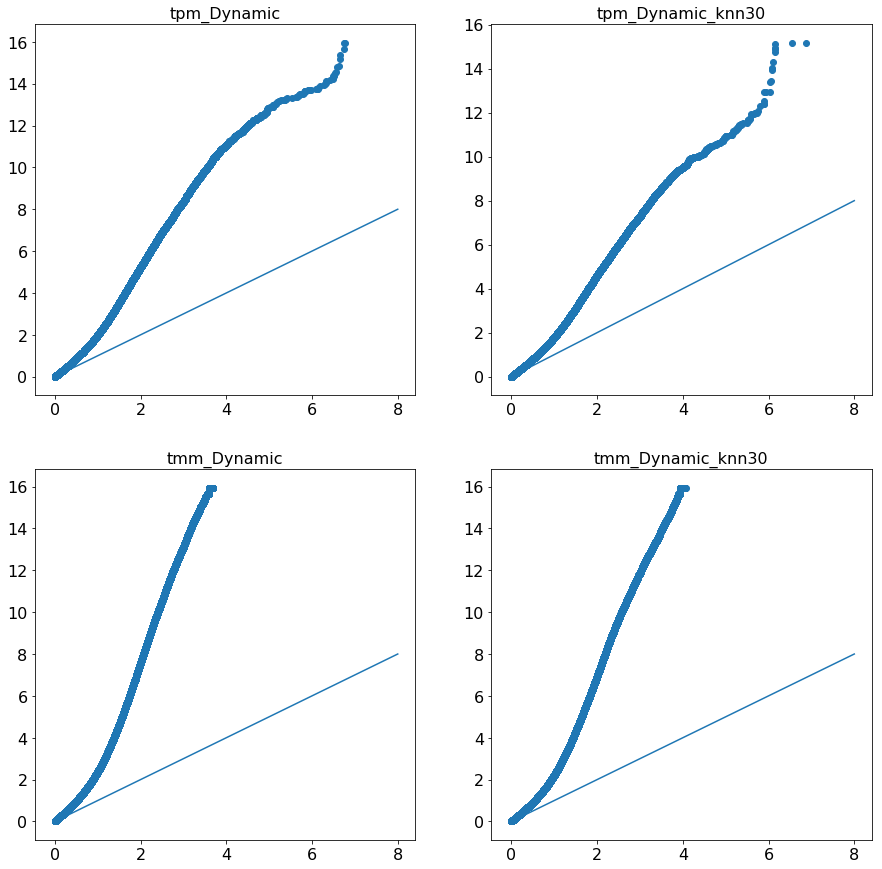

In [14]:
from scipy import stats
fig = plt.figure(figsize=(15,15))
i = 1
for expr in expressions:
    for sb in sbs:
        y = -np.log10(np.sort(datadict[expr+"_"+sb]))
        x = -np.log10(np.sort(datadict[expr+"_"+sb+"_rand"]))
        ax = fig.add_subplot(len(expressions), 2, i)
        # x = -np.log10(np.sort(pvals_random))
        # y = -np.log10(np.sort(pvals))
        ax.plot([0,8], [0,8])
        ax.set_title(expr+"_"+sb)
        ax.scatter(x,y)
        i += 1
plt.show()

In [246]:

# basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/gtex_v6_fix_sx2/"
basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/gtex_v6_nosqrt_dynamic/"
expr1 = "norm"
expr2 = "lmcorrected_it"
expr3 = "lasso"
sb = "0.05"

outdir = os.path.join(basedir, expr1, "gtex-ms/tejaas/permnull_sb{:s}/".format(sb))
outdir_random = os.path.join(basedir, expr1, "gtex-ms/tejaas_rand/permnull_sb{:s}/".format(sb))
outdir2 = os.path.join(basedir, expr2, "gtex-ms/tejaas/permnull_sb{:s}/".format(sb))
outdir_random2 = os.path.join(basedir, expr2, "gtex-ms/tejaas_rand/permnull_sb{:s}/".format(sb))
outdir3 = os.path.join(basedir, expr3, "gtex-ms/tejaas/permnull_sb{:s}/".format(sb))
outdir_random3 = os.path.join(basedir, expr3, "gtex-ms/tejaas_rand/permnull_sb{:s}/".format(sb))

pvals_norm = np.array([])
pvals_norm_random = np.array([])
pvals_lm = np.array([])
pvals_lm_random = np.array([])
pvals_lasso = np.array([])
pvals_lasso_random = np.array([])
for chrm in range(1,4):
    outfile_norm = os.path.join(outdir+"chr"+str(chrm), "rr.txt")
    outfile_norm_random = os.path.join(outdir_random+"chr"+str(chrm), "rr.txt")
    pvals_norm = np.append(pvals_norm, read_tejaas_rr_pvals(outfile_norm))
    pvals_norm_random = np.append(pvals_norm_random, read_tejaas_rr_pvals(outfile_norm_random))
    
    
    outfile_lm = os.path.join(outdir2+"chr"+str(chrm), "rr.txt")
    outfile_lm_random = os.path.join(outdir_random2+"chr"+str(chrm), "rr.txt")
    pvals_lm = np.append(pvals_lm, read_tejaas_rr_pvals(outfile_lm))
    pvals_lm_random = np.append(pvals_lm_random, read_tejaas_rr_pvals(outfile_lm_random))

for chrm in range(1,4):
    outfile_lasso = os.path.join(outdir3+"chr"+str(chrm), "rr.txt")
    outfile_lasso_random = os.path.join(outdir_random3+"chr"+str(chrm), "rr.txt")
    pvals_lasso = np.append(pvals_lasso, read_tejaas_rr_pvals(outfile_lasso))
    pvals_lasso_random = np.append(pvals_lasso_random, read_tejaas_rr_pvals(outfile_lasso_random))
    print(chrm, end=" ")

1 2 3 

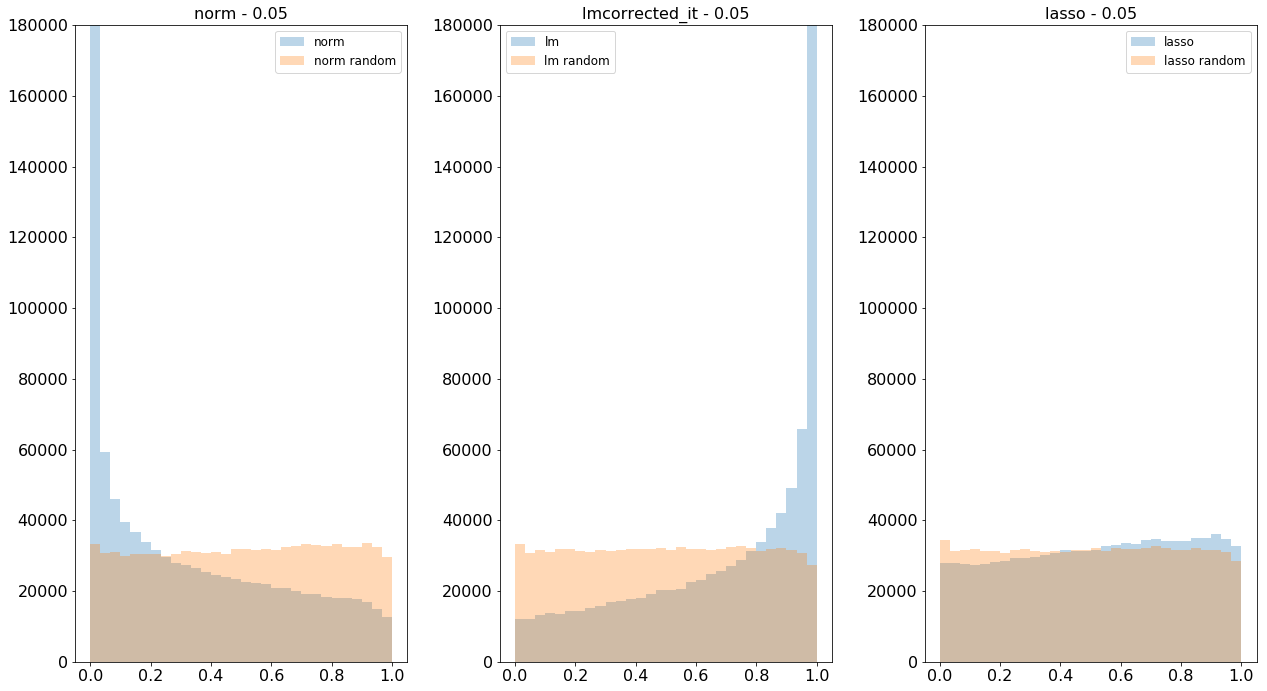

In [247]:
fig = plt.figure(figsize=(18,10))    
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.hist(pvals_norm, bins=30, density=False, alpha=0.3, label="norm")
ax2.hist(pvals_lm, bins=30, density=False, alpha=0.3, label="lm")
ax3.hist(pvals_lasso, bins=30, density=False, alpha=0.3, label="lasso")

ax1.hist(pvals_norm_random, bins=30, density=False, alpha=0.3, label="norm random")
ax2.hist(pvals_lm_random, bins=30, density=False, alpha=0.3, label="lm random")
ax3.hist(pvals_lasso_random, bins=30, density=False, alpha=0.3, label="lasso random")
ax1.set_title(expr1 + " - " + sb)
ax2.set_title(expr2 + " - " + sb)
ax3.set_title(expr3 + " - " + sb)
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_ylim(0,180000)
ax2.set_ylim(0,180000)
ax3.set_ylim(0,180000)
plt.tight_layout()
plt.show()

In [265]:
basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/fhs_nosqrt_dynamic_onerep/"
expr1 = "norm"
sb = "0.05"

outdir = os.path.join(basedir, expr1, "fhs/tejaas/permnull_sb"+sb+"/")
outdir_random = os.path.join(basedir, expr1, "fhs/tejaas_rand/permnull_sb"+sb+"/")

pvals_norm = np.array([])
pvals_norm_random = np.array([])

for chrm in range(1,4):
    outfile_norm = os.path.join(outdir+"chr"+str(chrm), "rr.txt")
    outfile_norm_random = os.path.join(outdir_random+"chr"+str(chrm), "rr.txt")
    
    pvals_norm = np.append(pvals_norm, read_tejaas_rr_pvals(outfile_norm))
    pvals_norm_random = np.append(pvals_norm_random, read_tejaas_rr_pvals(outfile_norm_random))
    
    print(chrm, end=" ")

1 2 3 

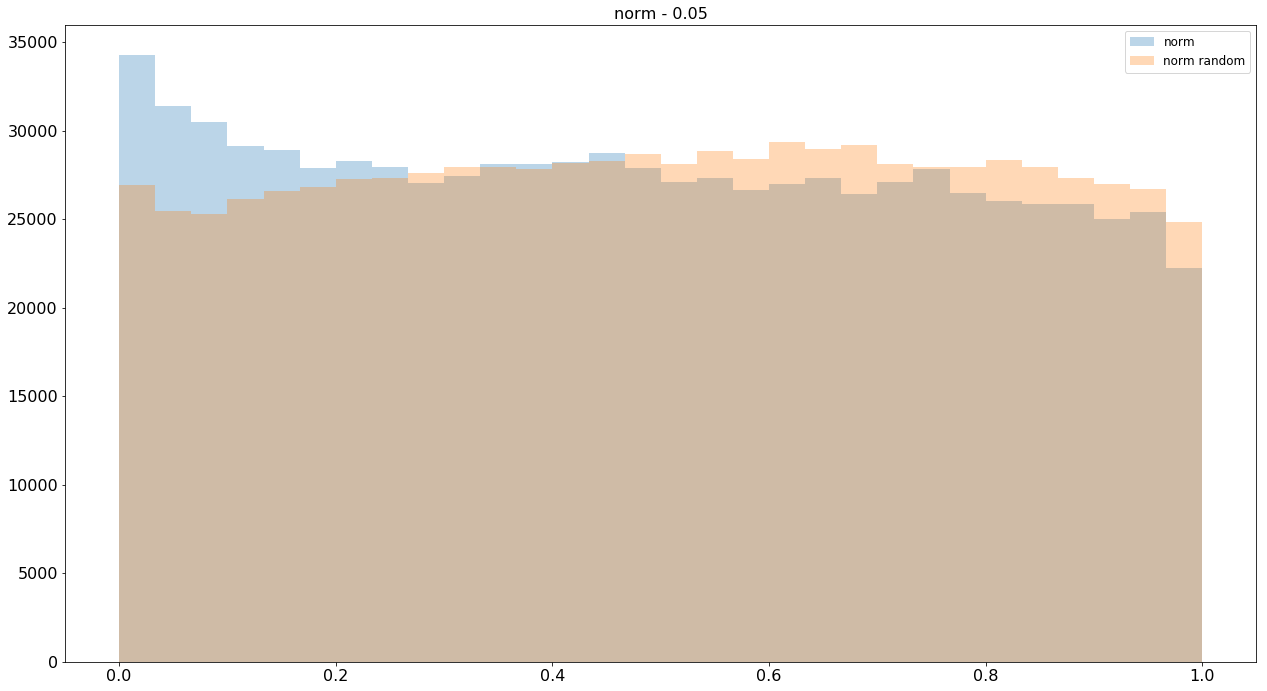

In [266]:
fig = plt.figure(figsize=(18,10))    
ax1 = fig.add_subplot(1,1,1)
ax1.hist(pvals_norm, bins=30, density=False, alpha=0.3, label="norm")

ax1.hist(pvals_norm_random, bins=30, density=False, alpha=0.3, label="norm random")
ax1.set_title(expr1 + " - " + sb)
ax1.legend()
# ax1.set_ylim(0,190000)
plt.tight_layout()
plt.show()

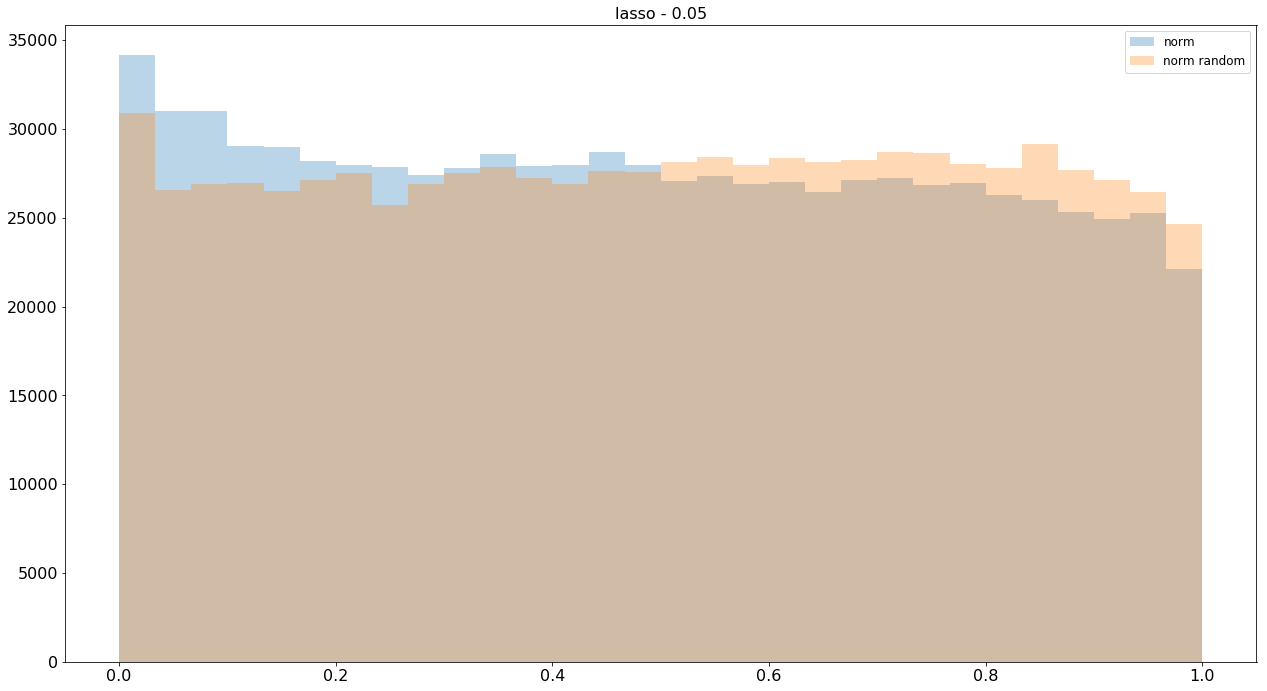

In [263]:
fig = plt.figure(figsize=(18,10))    
ax1 = fig.add_subplot(1,1,1)
ax1.hist(pvals_norm, bins=30, density=False, alpha=0.3, label="norm")

ax1.hist(pvals_norm_random, bins=30, density=False, alpha=0.3, label="norm random")
ax1.set_title(expr1 + " - " + sb)
ax1.legend()
# ax1.set_ylim(0,190000)
plt.tight_layout()
plt.show()

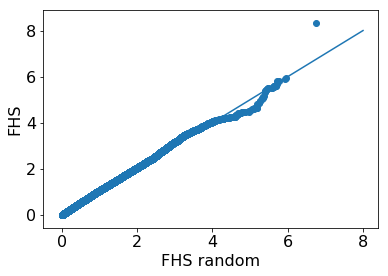

In [264]:
from scipy import stats
fig = plt.figure()
ax = fig.add_subplot(111)
x = -np.log10(np.sort(pvals_norm_random))
y = -np.log10(np.sort(pvals_norm))
ax.plot([0,8], [0,8])
ax.set_xlabel("FHS random")
ax.set_ylabel("FHS")
ax.scatter(x,y)
plt.show()

In [218]:
import collections
import gzip

SNPINFO_FIELDS = ['chrom', 'varid', 'bp_pos', 'ref_allele', 'alt_allele', 'maf']
class SnpInfo(collections.namedtuple('_SnpInfo', SNPINFO_FIELDS)):
    __slots__ = ()

def read_vcf(filename, startsnp, endsnp):
    dosage = list()
    snpinfo = list()
    linenum = 0
    with gzip.open(filename, 'r') as vcf:
        for line in vcf:
            linestrip = line.decode().strip()
            if linestrip[:2] == '##': continue
            if linestrip[:6] == '#CHROM':
                linesplit = linestrip.split("\t")
                donor_ids = linesplit[9:]
            else:
                if linenum >= startsnp and linenum < endsnp:
                    linesplit = linestrip.split("\t")
                    chrom = int(linesplit[0])
                    pos   = int(linesplit[1])
                    varid = linesplit[2]
                    ref   = linesplit[3]
                    alt   = linesplit[4]

                    dsindx = linesplit[8].split(':').index("DS")
                    ds = [x.split(':')[dsindx] for x in linesplit[9:]]
                    gtindx = linesplit[8].split(':').index("GT")
                    for i, x in enumerate(ds):
                        if x == ".":
                            gt = linesplit[9+i].split(':')[gtindx]
                            if len(gt) == 3 and gt[0] != "." and gt[2] != ".":
                                ds[i] = float(int(gt[0]) + int(gt[2]))

                    ds_notna = [float(x) for x in ds if x != "."]
                    freq = sum(ds_notna) / 2 / len(ds_notna)
                    maf = freq
                    snpdosage = [float(x) if x != '.' else 2 * freq for x in ds]

                    this_snp = SnpInfo(chrom      = chrom,
                                       bp_pos     = pos,
                                       varid      = varid,
                                       ref_allele = ref,
                                       alt_allele = alt,
                                       maf        = maf)

                    dosage.append(snpdosage)
                    snpinfo.append(this_snp)
                linenum += 1
                
                if linenum > endsnp:
                    break
    return np.array(dosage), snpinfo, donor_ids

f_vcf = "/cbscratch/franco/datasets/gtex/genotypes/vcfs_allsamples/GTEx_Analysis_20150112_OMNI_2.5M_5M_450Indiv_imput_info04_PASS_maf01_HWEp1E6_dbSNP135_ConstrVarIDs_chr1.vcf.gz"

In [224]:
gtvar = np.array([])
snp_infos = []
f_vcf = "/cbscratch/franco/datasets/gtex/genotypes/vcfs_allsamples/GTEx_Analysis_20150112_OMNI_2.5M_5M_450Indiv_imput_info04_PASS_maf01_HWEp1E6_dbSNP135_ConstrVarIDs_chr{:d}.vcf.gz"
chrms = [1,2,3]
for chrm in chrms:
    gtfull, snp_info, gt_donors = read_vcf(f_vcf.format(chrm), 0, 1000)
    gtvar = np.append(gtvar, np.var(gtfull,axis=1))
    snp_infos = snp_infos + snp_info

In [234]:
def read_tejaas_rr_SNPs(filename):
    # print("Loading ", filename)
    pvals = list()
    rsids = list()
    with open(filename, "r") as mfile:
        next(mfile)
        for line in mfile:
            arr = line.split()
            pvals.append(float(arr[5]))
            rsids.append(arr[0])
    pvals = np.array(pvals)
    return dict(zip(rsids, pvals))

# basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/gtex_v6_fix_sx2/"
basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/gtex_v6_nosqrt_dynamic//"
expr1 = "tmm_lasso"
sb = "0.05"

outdir = os.path.join(basedir, expr1, "gtex-ms/tejaas/permnull_sb{:s}/".format(sb))
outdir_random = os.path.join(basedir, expr1, "gtex-ms/tejaas_rand/permnull_sb{:s}/".format(sb))

mafs = np.array([])
y = np.array([])
x = np.array([])
pvals_norm = np.array([])
pvals_norm_random = np.array([])
for chrm in range(1,4):
    gtfull, snp_info, gt_donors = read_vcf(f_vcf.format(chrm), 0, 100000)
    gtvar = np.var(gtfull,axis=1)
    
    outfile_norm = os.path.join(outdir+"chr"+str(chrm), "rr.txt")
    outfile_norm_random = os.path.join(outdir_random+"chr"+str(chrm), "rr.txt")
    
    pvals_norm = read_tejaas_rr_SNPs(outfile_norm)
    pvals_norm_random = read_tejaas_rr_SNPs(outfile_norm_random)
    
    for i,snp in enumerate(snp_info):
        if pvals_norm.get(snp.varid, False):
            mafs = np.append(mafs, snp.maf)
            x = np.append(x, gtvar[i])
            y = np.append(y, pvals_norm[snp.varid])
    
    print(chrm, end=" ")

1 2 3 

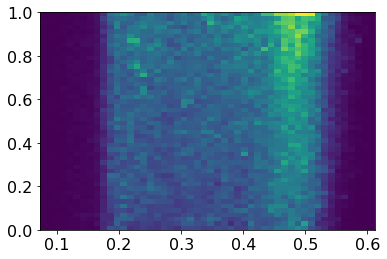

In [241]:
# ixs = np.argsort(y)

# plt.scatter(x[ixs], y[ixs], alpha=0.05)
# plt.show()

plt.hist2d(x, y, bins=50) #, alpha=0.05)
plt.show()

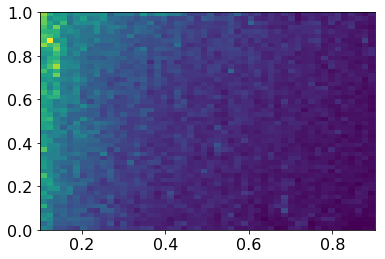

In [242]:
plt.hist2d(mafs, y, bins=50) #, alpha=0.05)
plt.show()

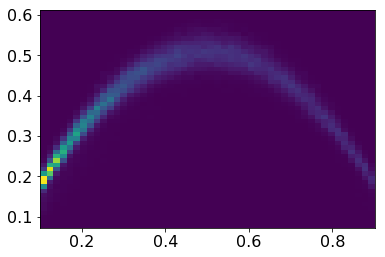

In [243]:
plt.hist2d(mafs, x, bins=50) #, alpha=0.05)
plt.show()